In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r'C:\Users\khint\OneDrive - belgiumcampus.ac.za\Documents\LaLiga Prediction\data\LaLiga_Matches.csv')

In [2]:
# Step 1: Prepare Season-Level Team Statistics
team_stats = []

for season, season_df in df.groupby("Season"):
    season_teams = {}
    for _, row in season_df.iterrows():
        home, away = row['HomeTeam'], row['AwayTeam']
        fthg, ftag, ftr = row['FTHG'], row['FTAG'], row['FTR']

        for team in [home, away]:
            if team not in season_teams:
                season_teams[team] = {
                    'Season': season, 'Team': team,
                    'Points': 0, 'GoalsScored': 0, 'GoalsConceded': 0,
                    'HomeWins': 0, 'AwayWins': 0
                }

        season_teams[home]['GoalsScored'] += fthg
        season_teams[home]['GoalsConceded'] += ftag
        season_teams[away]['GoalsScored'] += ftag
        season_teams[away]['GoalsConceded'] += fthg

        if ftr == 'H':
            season_teams[home]['Points'] += 3
            season_teams[home]['HomeWins'] += 1
        elif ftr == 'A':
            season_teams[away]['Points'] += 3
            season_teams[away]['AwayWins'] += 1
        else:
            season_teams[home]['Points'] += 1
            season_teams[away]['Points'] += 1

    team_stats.extend(season_teams.values())

stats_df = pd.DataFrame(team_stats)


In [3]:
# Top 4 teams per season
top4 = stats_df.sort_values(['Season', 'Points'], ascending=[True, False])
top4 = top4.groupby('Season').head(4)

In [4]:
# Most home wins
home_wins = stats_df.groupby('Team')['HomeWins'].sum().sort_values(ascending=False).head(10)

# Most away wins
away_wins = stats_df.groupby('Team')['AwayWins'].sum().sort_values(ascending=False).head(10)


In [5]:
# Most goals scored
goals_scored = stats_df.groupby('Team')['GoalsScored'].sum().sort_values(ascending=False).head(10)

# Most goals conceded
goals_conceded = stats_df.groupby('Team')['GoalsConceded'].sum().sort_values(ascending=False).head(10)

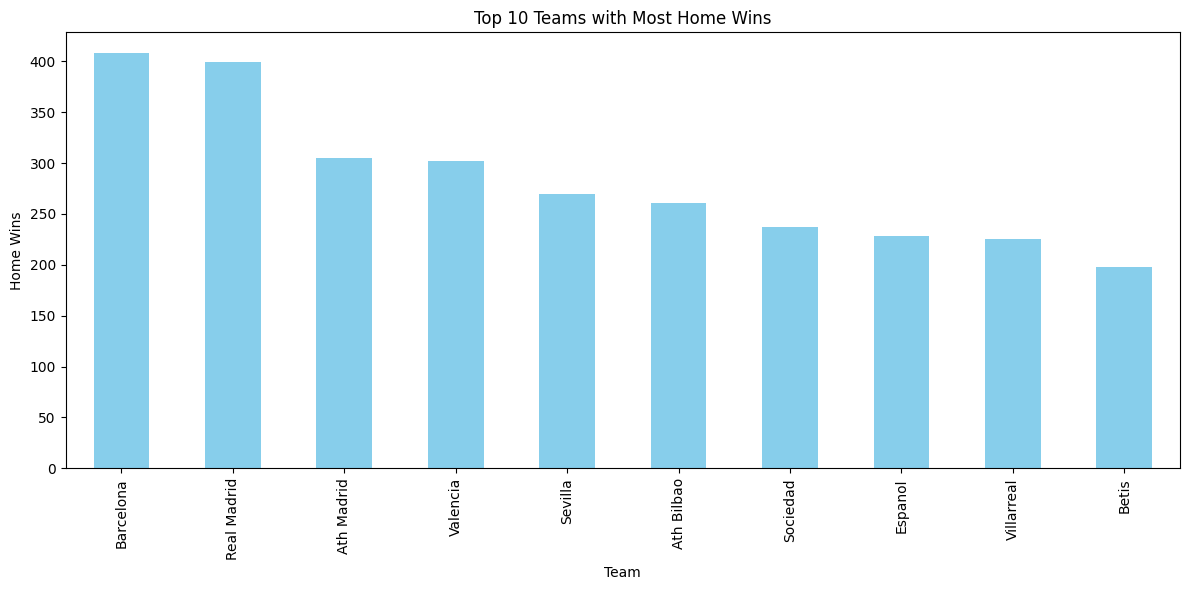

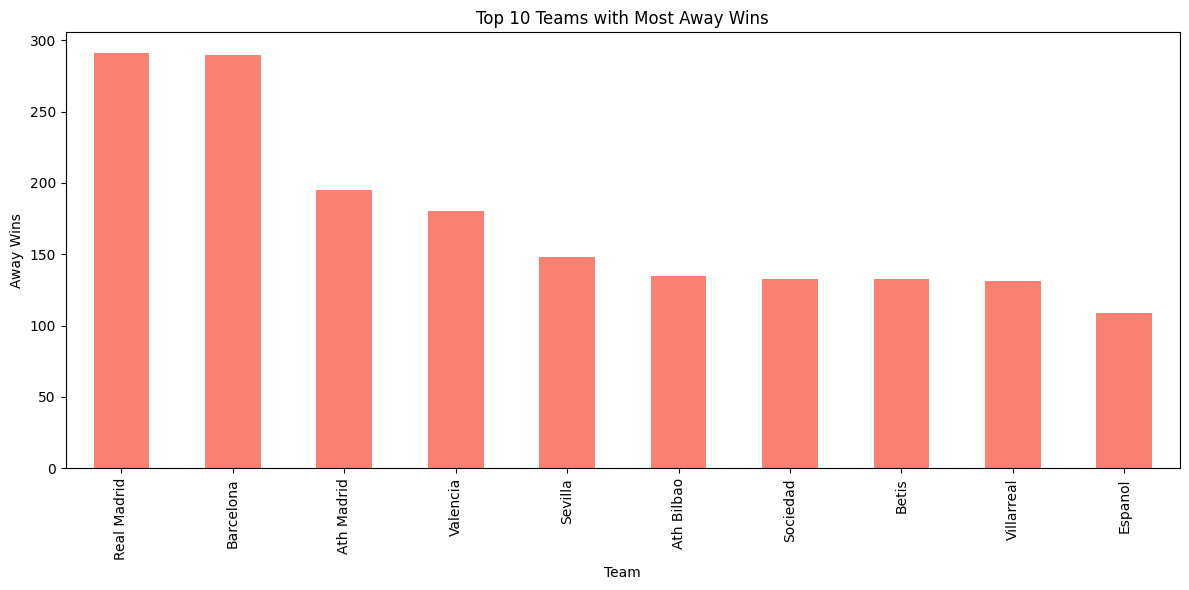

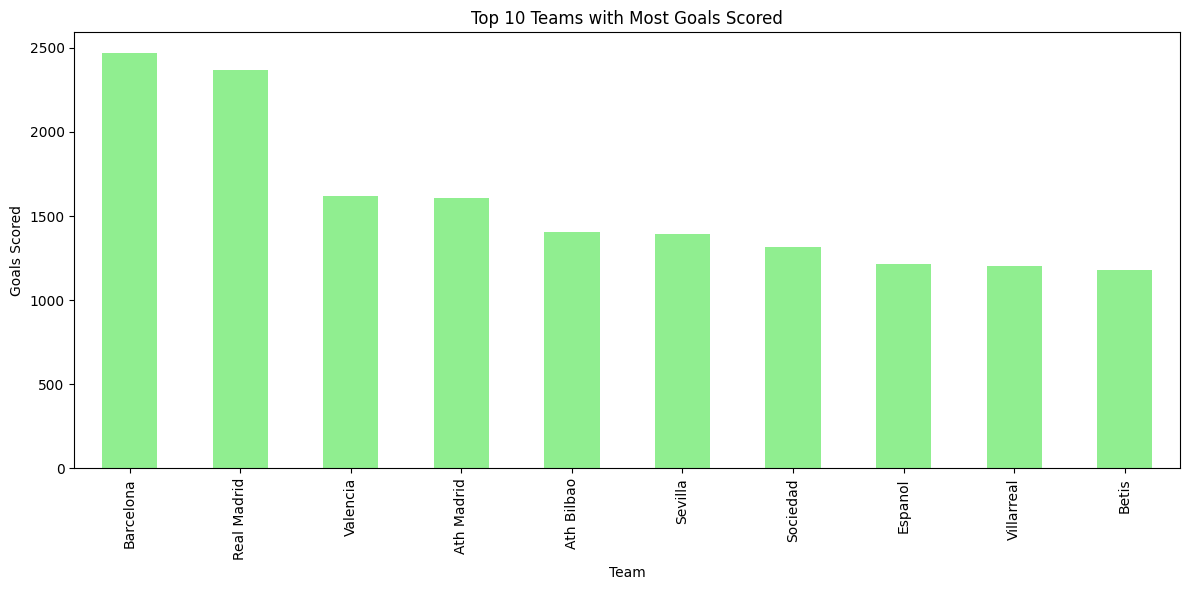

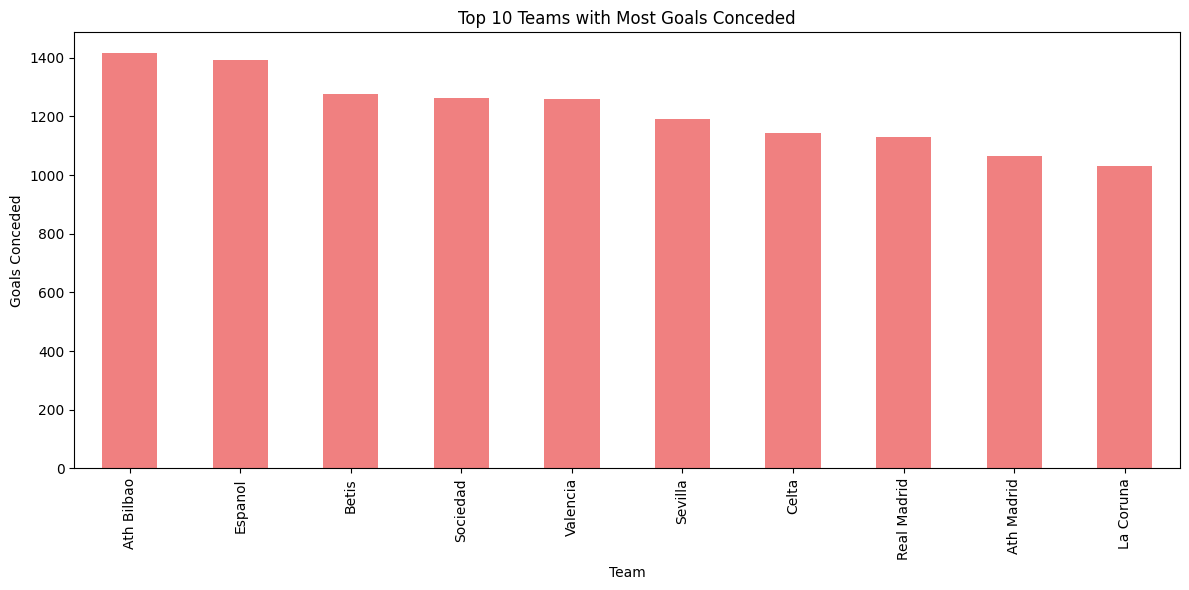

In [6]:
# Plotting
plt.figure(figsize=(12, 6))
home_wins.plot(kind='bar', title='Top 10 Teams with Most Home Wins', color='skyblue')
plt.ylabel('Home Wins')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
away_wins.plot(kind='bar', title='Top 10 Teams with Most Away Wins', color='salmon')
plt.ylabel('Away Wins')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
goals_scored.plot(kind='bar', title='Top 10 Teams with Most Goals Scored', color='lightgreen')
plt.ylabel('Goals Scored')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
goals_conceded.plot(kind='bar', title='Top 10 Teams with Most Goals Conceded', color='lightcoral')
plt.ylabel('Goals Conceded')
plt.tight_layout()
plt.show()


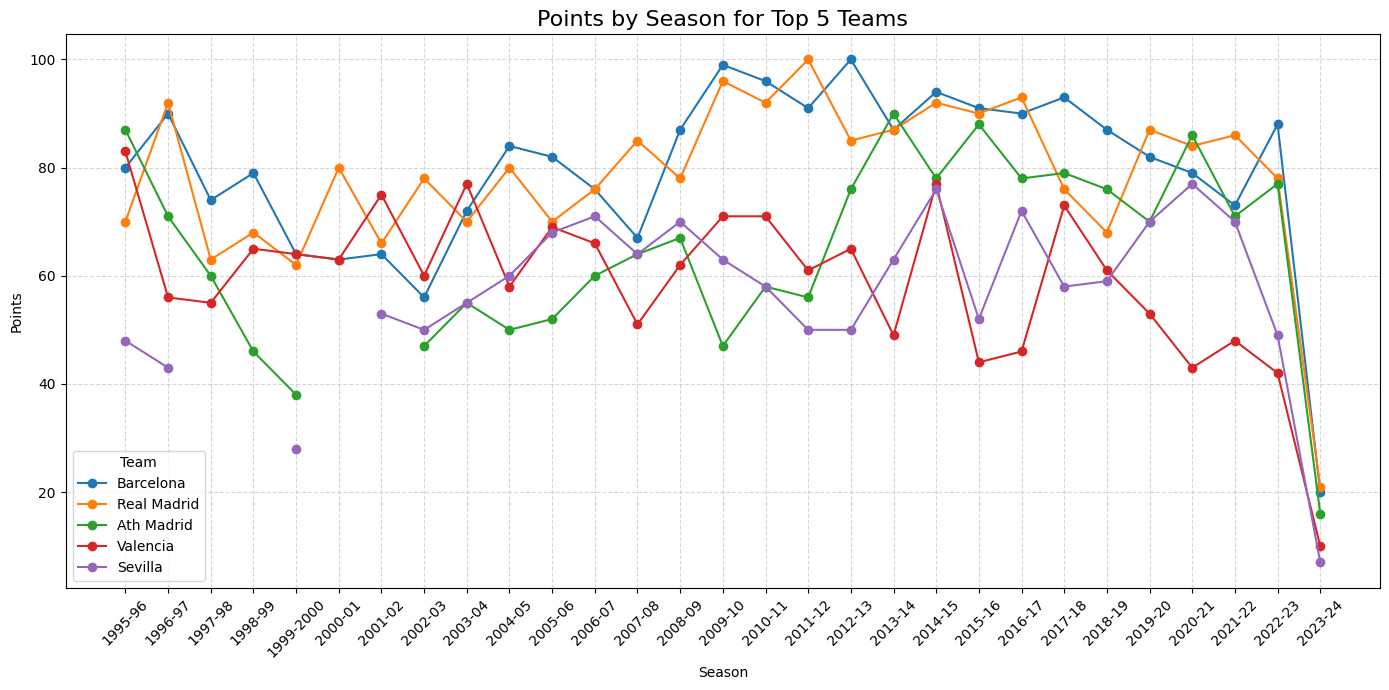

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare team-season level stats
team_stats = []

for season, season_df in df.groupby("Season"):
    season_teams = {}
    for _, row in season_df.iterrows():
        home, away = row['HomeTeam'], row['AwayTeam']
        fthg, ftag, ftr = row['FTHG'], row['FTAG'], row['FTR']

        for team in [home, away]:
            if team not in season_teams:
                season_teams[team] = {
                    'Season': season, 'Team': team,
                    'Points': 0, 'GoalsScored': 0, 'GoalsConceded': 0,
                    'HomeWins': 0, 'AwayWins': 0
                }

        # Update stats
        season_teams[home]['GoalsScored'] += fthg
        season_teams[home]['GoalsConceded'] += ftag
        season_teams[away]['GoalsScored'] += ftag
        season_teams[away]['GoalsConceded'] += fthg

        if ftr == 'H':
            season_teams[home]['Points'] += 3
            season_teams[home]['HomeWins'] += 1
        elif ftr == 'A':
            season_teams[away]['Points'] += 3
            season_teams[away]['AwayWins'] += 1
        else:
            season_teams[home]['Points'] += 1
            season_teams[away]['Points'] += 1

    team_stats.extend(season_teams.values())

# Convert to DataFrame
team_stats_df = pd.DataFrame(team_stats)

# Focus on top 5 teams
top_teams = ['Barcelona', 'Real Madrid', 'Ath Madrid', 'Valencia', 'Sevilla']
top_team_stats = team_stats_df[team_stats_df['Team'].isin(top_teams)]

# Pivot for line plot
points_by_season = top_team_stats.pivot(index='Season', columns='Team', values='Points')
points_by_season = points_by_season.sort_index()

# Plotting
plt.figure(figsize=(14, 7))
for team in top_teams:
    plt.plot(points_by_season.index, points_by_season[team], label=team, marker='o')

plt.title('Points by Season for Top 5 Teams', fontsize=16)
plt.xlabel('Season')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Team')
plt.tight_layout()
plt.show()


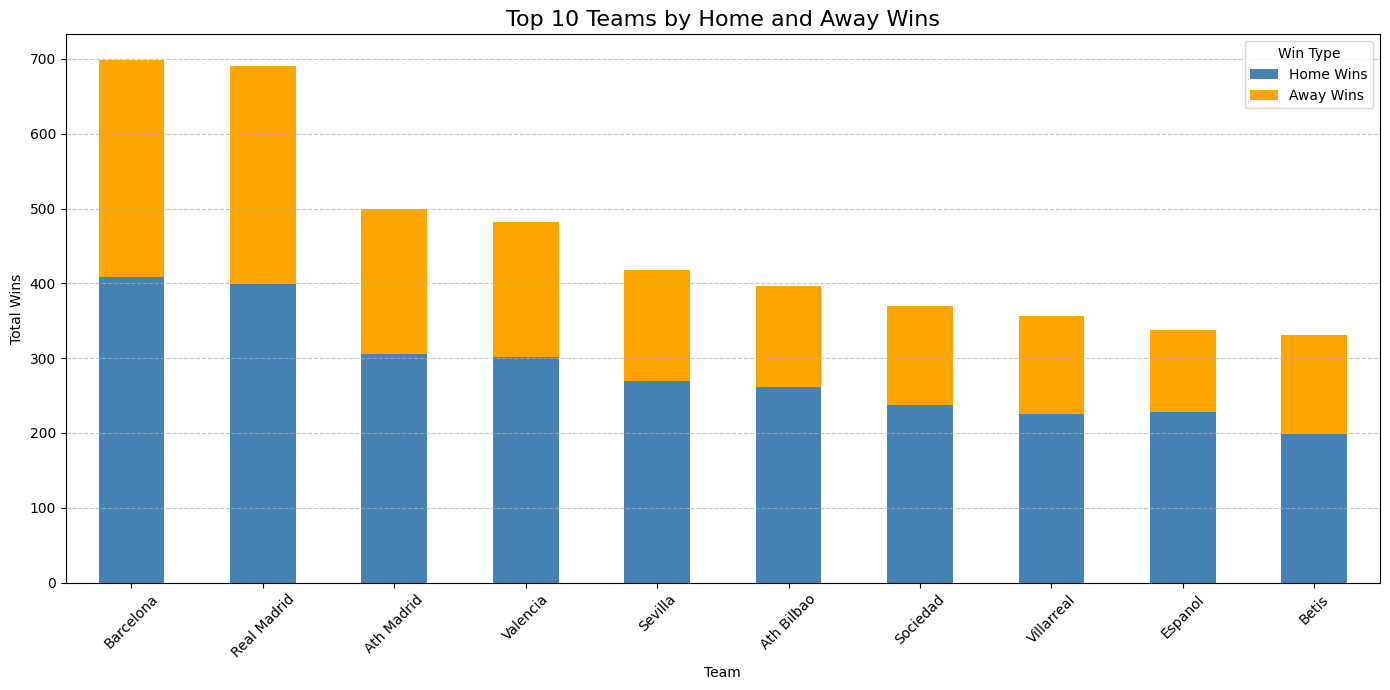

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Reuse or load processed team_stats_df
# (if not already in your script, reuse the previous team_stats creation block here)

# Group total wins per team
home_wins = team_stats_df.groupby('Team')['HomeWins'].sum()
away_wins = team_stats_df.groupby('Team')['AwayWins'].sum()

# Combine into a DataFrame
wins_df = pd.DataFrame({'Home Wins': home_wins, 'Away Wins': away_wins})
wins_df['Total Wins'] = wins_df['Home Wins'] + wins_df['Away Wins']

# Sort and get top 10
wins_df = wins_df.sort_values('Total Wins', ascending=False).head(10)

# Plot stacked bar chart
wins_df[['Home Wins', 'Away Wins']].plot(kind='bar', stacked=True, figsize=(14, 7),
                                         color=['steelblue', 'orange'])

plt.title('Top 10 Teams by Home and Away Wins', fontsize=16)
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.legend(title='Win Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\khint\AppData\Local\Temp\ipykernel_360\879094202.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_counts.index, y=result_counts.values, palette='Set2')


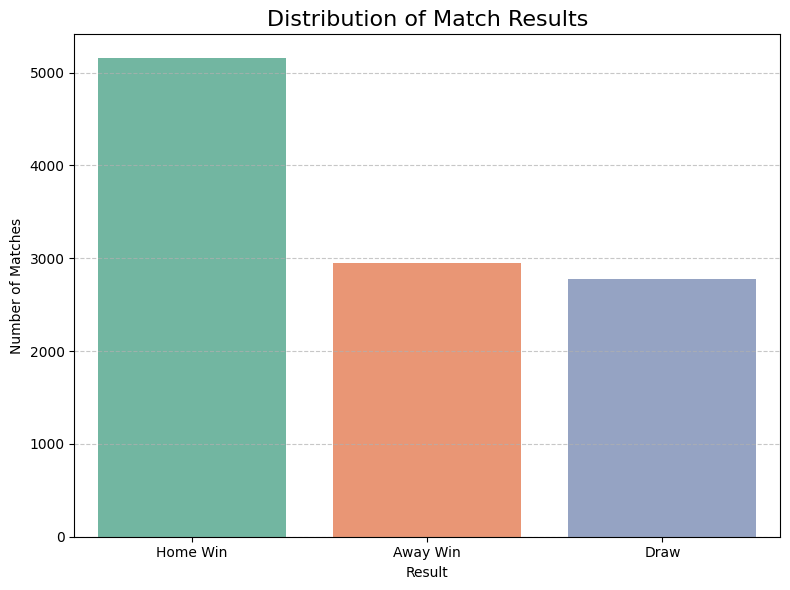

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count match results
result_counts = df['FTR'].value_counts().rename(index={'H': 'Home Win', 'D': 'Draw', 'A': 'Away Win'})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=result_counts.index, y=result_counts.values, palette='Set2')
plt.title('Distribution of Match Results', fontsize=16)
plt.ylabel('Number of Matches')
plt.xlabel('Result')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


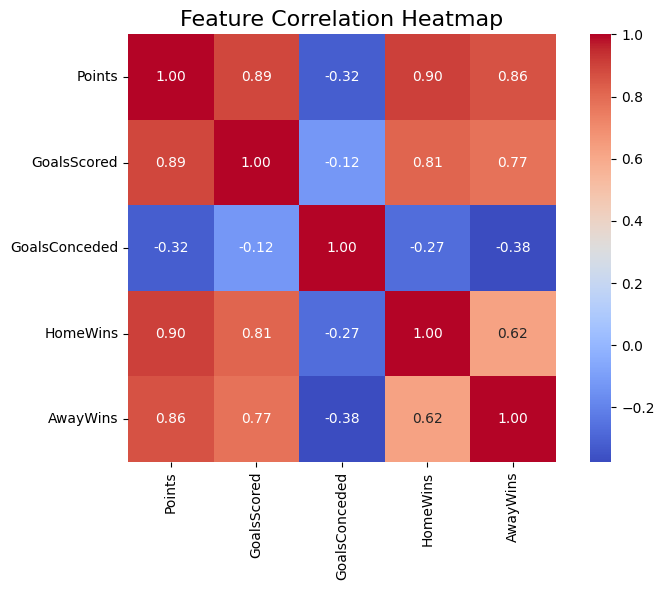

In [10]:
# Compute correlations
corr_matrix = team_stats_df[['Points', 'GoalsScored', 'GoalsConceded', 'HomeWins', 'AwayWins']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()
